In [22]:
# !pip install mlxtend


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori , association_rules
from sklearn.preprocessing import LabelEncoder

In [24]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print("Train data shape:", train.shape)
print("Test data shape:", test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)
# X = train.drop('satisfaction', axis=1)
X = train
train

Train data shape: (103904, 25)
Test data shape: (25976, 25)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [25]:
for i in X.columns:
    X[i] = X[i].astype('str')

# change the categorical data to one hot encoded different columns 
# as the apriori algorithm takes only numerical data 
train_encoded = pd.get_dummies(X)

frequent_itemsets = apriori(train_encoded, min_support=0.3, use_colnames=True)

frequent_itemsets 


d:\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.507459,(Gender_Female)
1,0.492541,(Gender_Male)
2,0.817322,(Customer Type_Loyal Customer)
3,0.689627,(Type of Travel_Business travel)
4,0.310373,(Type of Travel_Personal Travel)
5,0.477989,(Class_Business)
6,0.449886,(Class_Eco)
7,0.305715,(Seat comfort_4)
8,0.359784,(Baggage handling_4)
9,0.365193,(Inflight service_4)


In [26]:
rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gender_Female),(Type of Travel_Business travel),0.507459,0.689627,0.351555,0.692776,1.004566,0.001598,1.010250,0.009229
1,(Type of Travel_Business travel),(Gender_Female),0.689627,0.507459,0.351555,0.509776,1.004566,0.001598,1.004727,0.014645
2,(Customer Type_Loyal Customer),(Gender_Male),0.817322,0.492541,0.408695,0.500041,1.015227,0.006130,1.015001,0.082105
3,(Gender_Male),(Customer Type_Loyal Customer),0.492541,0.817322,0.408695,0.829767,1.015227,0.006130,1.073109,0.029557
4,(Type of Travel_Personal Travel),(Customer Type_Loyal Customer),0.310373,0.817322,0.308795,0.994915,1.217286,0.055120,35.921894,0.258836
...,...,...,...,...,...,...,...,...,...,...
67,"(Class_Business, Type of Travel_Business travel)","(satisfaction_satisfied, Customer Type_Loyal C...",0.457230,0.390100,0.301307,0.658984,1.689267,0.122941,1.788476,0.751749
68,(satisfaction_satisfied),"(Class_Business, Customer Type_Loyal Customer,...",0.433333,0.386539,0.301307,0.695325,1.798845,0.133807,2.013490,0.783684
69,(Customer Type_Loyal Customer),"(satisfaction_satisfied, Class_Business, Type ...",0.817322,0.329304,0.301307,0.368652,1.119487,0.032160,1.062323,0.584273
70,(Class_Business),"(satisfaction_satisfied, Customer Type_Loyal C...",0.477989,0.358793,0.301307,0.630363,1.756901,0.129808,1.734697,0.825301


In [27]:
rules_df = rules_df.sort_values(['confidence', 'lift'], ascending =[False, False])
rules_df[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Type of Travel_Personal Travel),(Customer Type_Loyal Customer),0.310373,0.817322,0.308795,0.994915,1.217286,0.055120,35.921894,0.258836
48,"(satisfaction_satisfied, Class_Business)",(Type of Travel_Business travel),0.331845,0.689627,0.329304,0.992343,1.438957,0.100455,40.536600,0.456559
58,"(satisfaction_satisfied, Customer Type_Loyal C...",(Type of Travel_Business travel),0.303848,0.689627,0.301307,0.991638,1.437934,0.091765,37.116618,0.437487
14,(Class_Business),(Type of Travel_Business travel),0.477989,0.689627,0.457230,0.956569,1.387082,0.127595,7.146350,0.534591
24,"(Class_Business, Customer Type_Loyal Customer)",(Type of Travel_Business travel),0.407193,0.689627,0.386539,0.949278,1.376509,0.105728,6.119093,0.461406
16,(satisfaction_satisfied),(Type of Travel_Business travel),0.433333,0.689627,0.401775,0.927174,1.344457,0.102937,4.261832,0.452126
30,"(satisfaction_satisfied, Customer Type_Loyal C...",(Type of Travel_Business travel),0.390100,0.689627,0.358793,0.919744,1.333684,0.089769,3.867307,0.410227
37,"(satisfaction_satisfied, Class_Business)",(Customer Type_Loyal Customer),0.331845,0.817322,0.303848,0.915632,1.120284,0.032624,2.165262,0.160695
60,"(satisfaction_satisfied, Class_Business, Type ...",(Customer Type_Loyal Customer),0.329304,0.817322,0.301307,0.914981,1.119487,0.032160,2.148683,0.159139
63,"(satisfaction_satisfied, Class_Business)","(Customer Type_Loyal Customer, Type of Travel_...",0.331845,0.508527,0.301307,0.907976,1.785501,0.132555,5.340682,0.658429


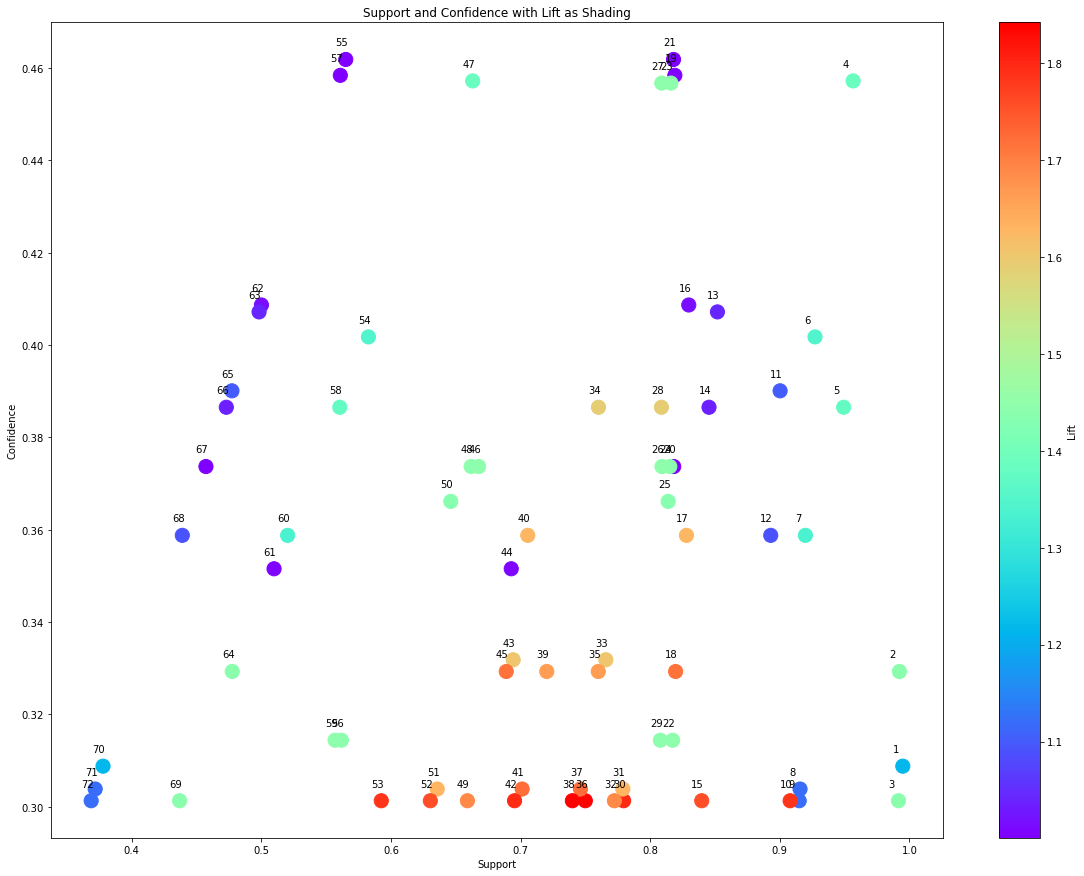

In [28]:
support = rules_df['support'].values
confidence = rules_df['confidence'].values
lift = rules_df['lift'].values


plt.figure(figsize=(20,15))
plt.scatter(confidence, support, c=lift, cmap='rainbow', s=200)

for i in range(len(support)):
    plt.annotate(str(i+1), (confidence[i]-8e-3, support[i]+3e-3))
   
    
# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Lift')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support and Confidence with Lift as Shading')

# Show the plot
plt.show()

# the most important rules are

the heights rules is the  rules that have the heighest  confidence and lift 

**1-rule 9 (Type of Travel = Personal Travel                     => Customer Type = Loyal Customer)**

**2-rule 46 (Type of Travel = Personal Travel, Class = Eco       => Customer Type = Loyal Customer)**

**3-rule 62 (Arrival Delay in Minutes  = 0.0, Class = Business   => Type of Travel=Business travel)**

**4-rule 57 (Departure Delay in Minutes = 0, Class = Business    => Type of Travel_Business travel)**

**5-rule 21 (Class = Business                                    => Type of Travel = Business travel)**

**6-rule 35 (Customer Type = Loyal Customer, Class = Business    => Type of Travel = Business travel)**

**7-rule 15 (Seat comfort = 4                                    => Customer Type = Loyal Customer)**

**8-rule 12 (Online boarding = 4                                 => Customer Type = Loyal Customer)**

**9-rule 11 (Class = Business                                    => Customer Type = Loyal Customer)**

**10-rule 37 (Type of Travel = Business travel, Class = Business => Customer Type = Loyal Customer)**

the Type of Travel seems to be a very important attribute as it appears in the most of the rules 




We can see that (Type of Travel, Customer Type, Class) exist in many rules together, which means that there is a significant relationship between them.

There are some conditions when met, it is more likely that the customer is a loyal customer, such as:
- when he uses the airline for a personal travel 
- when he uses the airline for a personal travel and in an economy class
- when he uses the airline is in an business class
- when he uses the airline in a business travel and in an business class
- when he rates some services with a high rate

There are some conditions also when met, it is more likely that the customer's travel is a business travel:
- when the flight is in an business class
- when the flight is in an business class and the customer is loyal


In [29]:
rules_df = rules_df.sort_values(['confidence', 'lift'], ascending =[False, False])
rules_df = rules_df[rules_df['consequents'].astype(str).str.contains('satisfaction')]
rules_df[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(Class_Eco),(satisfaction_neutral or dissatisfied),0.449886,0.566667,0.366146,0.813862,1.436226,0.111210,2.328024,0.552124
61,"(Class_Business, Customer Type_Loyal Customer,...",(satisfaction_satisfied),0.386539,0.433333,0.301307,0.779499,1.798845,0.133807,2.569903,0.723906
38,"(Class_Business, Customer Type_Loyal Customer)",(satisfaction_satisfied),0.407193,0.433333,0.303848,0.746201,1.722004,0.127398,2.232737,0.707281
65,"(Class_Business, Customer Type_Loyal Customer)","(satisfaction_satisfied, Type of Travel_Busine...",0.407193,0.401775,0.301307,0.739961,1.841731,0.137707,2.300519,0.770963
50,"(Class_Business, Type of Travel_Business travel)",(satisfaction_satisfied),0.457230,0.433333,0.329304,0.720216,1.662038,0.131171,2.025371,0.733882
32,"(Customer Type_Loyal Customer, Type of Travel_...",(satisfaction_satisfied),0.508527,0.433333,0.358793,0.705553,1.628201,0.138431,1.924513,0.785039
19,(Class_Business),(satisfaction_satisfied),0.477989,0.433333,0.331845,0.694251,1.602121,0.124716,1.853377,0.719961
52,(Class_Business),"(satisfaction_satisfied, Type of Travel_Busine...",0.477989,0.401775,0.329304,0.688936,1.714732,0.137260,1.923157,0.798486
67,"(Class_Business, Type of Travel_Business travel)","(satisfaction_satisfied, Customer Type_Loyal C...",0.457230,0.390100,0.301307,0.658984,1.689267,0.122941,1.788476,0.751749
41,(Class_Business),"(satisfaction_satisfied, Customer Type_Loyal C...",0.477989,0.390100,0.303848,0.635679,1.629526,0.117384,1.674072,0.740071


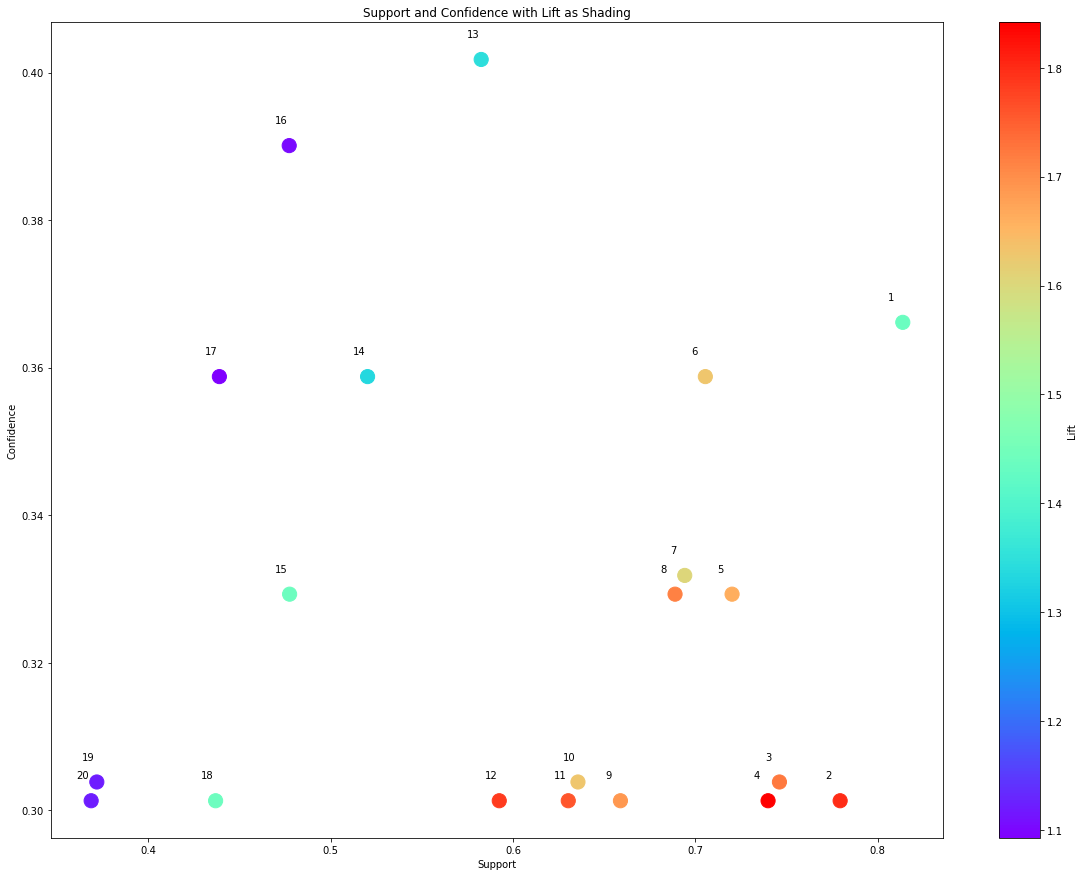

In [30]:
support = rules_df['support'].values
confidence = rules_df['confidence'].values
lift = rules_df['lift'].values


plt.figure(figsize=(20,15))
plt.scatter(confidence, support, c=lift, cmap='rainbow', s=200)

for i in range(len(support)):
    plt.annotate(str(i+1), (confidence[i]-8e-3, support[i]+3e-3))
   
    
# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Lift')

plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support and Confidence with Lift as Shading')

# Show the plot
plt.show()